# 수업 내용

- 평균대치
- 선형보간
- sklearn iterative imputer를 사용해서 실제 결측값을 대체하고
- 해당 결측값을 대체한 것을 회귀분석을 통해 mse 차이가 어떤 식으로 나오는지 비교
- mse 오차에 대한 개념 예측한 갑솨 실체 값의 차이

- 선형보간의 경우 interpolation 기존에 데이터를 보고 결측을 메꾸는 방식
- 해당 방식이 과연 데이터의 올바른 결측치 대체 방법인지?

In [6]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

import seaborn as sns
import numpy as np
import pandas as pd

df=sns.load_dataset('mpg')

In [7]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [8]:
#df_x = df.copy()
#df_x.iloc[0:5] = np.nan # 값을 NaN 처리해줌
#df_x

In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df_x = df[['cylinders', 'displacement', 'horsepower', 'weight']]

In [11]:
# 결측치 임의로 만들기
msv = np.random.randint(0,389,size = 30) # 숫자 중복으로 추출될 수도 있음
msv

array([268, 176,  84,  74, 101, 215, 250, 142,  76, 215, 348,  15, 305,
       174,   8, 174, 128, 131,  96, 138, 384,  45, 344, 142, 338, 230,
        20,  11,  81, 101])

In [12]:
df_x.iloc[msv] = np.nan

In [13]:
df_x.isna().sum()

cylinders       26
displacement    26
horsepower      32
weight          26
dtype: int64

In [14]:
df_sp1 = pd.concat([df_x, df['mpg']], axis = 1)
df_sp2 = pd.concat([df_x, df['mpg']], axis = 1)
df_sp3 = pd.concat([df_x, df['mpg']], axis = 1)

# 평균으로 대체
- cylinders       29
- displacement    29
- horsepower      35
- weight          29

In [15]:
df_x.cylinders.mean()

5.438172043010753

In [16]:
df_x.displacement.mean()

192.65994623655914

In [17]:
df_x.horsepower.mean()

104.04371584699453

In [18]:
df_x.weight.mean()

2969.3440860215055

In [19]:
# 평균으로 결측치 대체
df_sp1['cylinders'] = df_sp1['cylinders'].fillna(df_x.cylinders.mean())
df_sp1['displacement'] = df_sp1['displacement'].fillna(df_x.displacement.mean())
df_sp1['horsepower'] = df_sp1['horsepower'].fillna(df_x.horsepower.mean())
df_sp1['weight'] = df_sp1['weight'].fillna(df_x.weight.mean())

In [20]:
df_sp1.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [21]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp1.drop('mpg', axis = 1), df_sp1['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [22]:
import statsmodels.api as sm # 회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt

In [23]:
fit_train1 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)

In [24]:
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델

In [25]:
y_sm_pred = fit_train1.predict(x_test)

In [26]:
# 실제 mpg 예측
np.array(y_sm_pred)

array([22.93057255, 33.28781551, 19.91105498, 23.2406315 , 26.80267646,
       18.39726249, 25.02151838, 23.75250078,  6.3443658 , 23.67067948,
       26.57226644, 25.02411979, 27.03385673, 23.28631504, 28.60218686,
       21.05804299,  3.27241329, 23.56006545, 23.99089249, 24.7473363 ,
       22.29364025, 24.7374977 ,  0.87701259, 28.15482164,  1.70903909,
       17.75631471, 27.76685387, 24.96668528, 25.1068012 , 13.97225841,
       25.17749366, 21.63416413,  4.59149469, 21.33294597, 18.77870574,
       26.87216764, 15.39617114, 27.66652808, 19.21479529, 24.16778758,
       22.29364025, 20.88152427, 21.99633285, 30.45439233,  7.27480281,
       26.2137168 , 25.9887428 , 30.4755265 , 27.82697575, 14.61484454,
       23.58995062, 26.96555396, 22.29364025, 24.6521166 , 24.07145954,
       22.49321685,  7.87725143, 20.94570076, 24.59487582, 12.95501776,
       30.10513892, 22.29364025, 26.12020885, 27.73245483, 24.71510286,
       16.65099742, 28.07465308, 27.01555908, -2.5581949 , 27.12

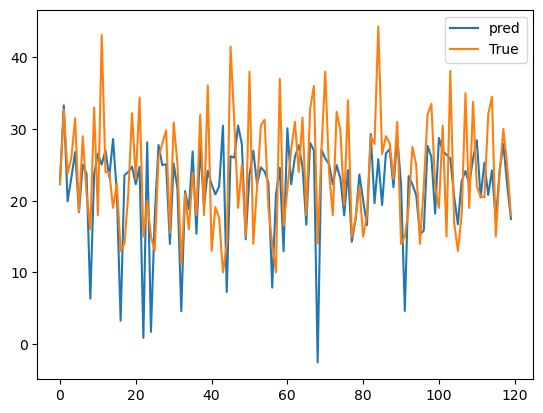

In [27]:
#예측과 실제값 비교 차트 시각화
plt.plot(np.array(y_sm_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [28]:
# mse(오차 제곱 평균) 구하기
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = y_sm_pred)
print(mse1)

# 평균으로 결측치 대체 결과 : mse 51.36849277820641

53.16363376542702


# 보간법 활용해서 결측치 채우기

- 선형보간법

In [29]:
df_sp2['cylinders'] = df_sp2['cylinders'].interpolate(method = 'linear')
df_sp2['displacement'] = df_sp2['displacement'].interpolate(method = 'linear')
df_sp2['horsepower'] = df_sp2['horsepower'].interpolate(method = 'linear')
df_sp2['weight'] = df_sp2['weight'].interpolate(method = 'linear')

In [30]:
df_sp2.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('mpg', axis = 1), df_sp2['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [32]:
fit_train2 = sm.OLS(y_train, x_train)

In [33]:
fit_train2 = fit_train2.fit()

In [34]:
y_sm_pred = fit_train2.predict(x_test)

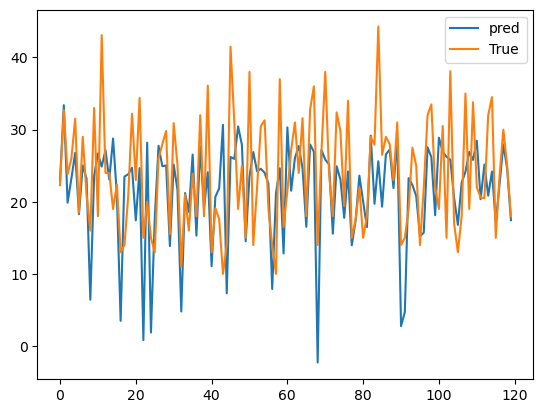

In [35]:
plt.plot(np.array(y_sm_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = y_sm_pred)
print(mse2)

# 선형보간법으로 결측치 채운 결과 : mse 51.65124129309988

53.77048520568778


## IterativeImputer 활용해서 결측치 채우기

- sklearn 패지키 중 하나
- 하이퍼 파라미터로 조정 가능
- 다른 모든 특성에서 각 특성을 추정하는 다변량 대치방법


In [37]:
imputer = IterativeImputer(imputation_order = 'descending',
                           max_iter = 10, random_state = 111, # max_iter -> 반복 수
                           n_nearest_features = 4) # 예측을 위해 사용하는 feature 수

df_sp3 = imputer.fit_transform(df_sp3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [38]:
# 반환값이 array로 
df_sp3

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [39]:
# 데이터프레임으로 변환
df_sp3 = pd.DataFrame(df_sp3)

In [41]:
df_sp3

,0,1,2,3,4
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [42]:
# 컬럼명 가져오기
df_sp2.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'mpg'], dtype='object')

In [43]:
df_sp3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']

In [44]:
df_sp3

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('mpg', axis = 1), df_sp3['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [46]:
fit_train2 = sm.OLS(y_train, x_train)

In [47]:
fit_train2 = fit_train2.fit()

In [48]:
y_sm_pred = fit_train2.predict(x_test)

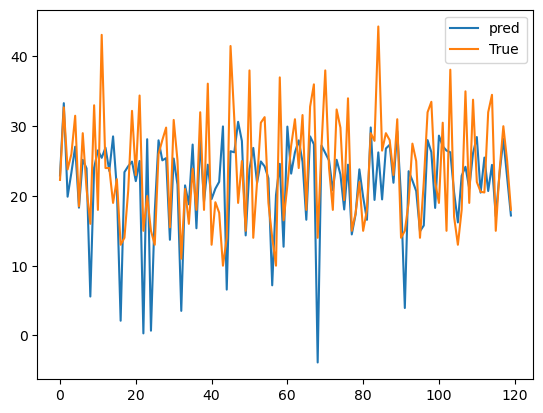

In [49]:
plt.plot(np.array(y_sm_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [50]:
mse3 = mean_squared_error(y_true = y_test, y_pred = y_sm_pred)
print(mse3)

# iterativeimputer로 결측치 대치 결과 : mse 52.34443329592201

52.34443329592201


In [51]:
# 정리 :

print('단순평균대치법 : ', mse1)
print('선형보간법 : ', mse2)
print('iterative imputer : ', mse3)

단순평균대치법 :  53.16363376542702
선형보간법 :  53.77048520568778
iterative imputer :  52.34443329592201


## 필수과제 1

1. simpleimputer (간단한 개념이라 리서치, 실제 코드 작성, 값에 대한 결과 정리)
 - 다양하게 통계치 지정 (평균, 최빈값 등등) 결과가 어떤식으로 바뀌는지 mpg 데이터를 가지고 확인


## 필수과제 2

2. 만약 시계열 데이터라면?
 - 평균 또는 최빈값 등 기초통계량
 - 선형보간 등 interpolation
 - iterative imputer
 ---
 - 시계열 데이터는 어떤 식으로 결측값을 대체 했을 때 좋은 결과가 나오는지 확인하기!
 - 시계열 데이터는 결측값을 만들기 전에 기존 데이터의 분포와 관계, 컬럼들에 대한 관계들을 확인 (간단한 시각화로)
 - 결측치를 만들어서 결과 비교
 
 ## 필수과제 3
 - 최종 결과물은 PDF 파일로 정리, 5장 내로 결과만 정리
 
 ### 데드라인
 - 